<a href="https://colab.research.google.com/github/Aashish123-aikki/MachineLearning/blob/main/RealEstate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('benghouse.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df=df.drop(['society'],axis=1)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df2=df.dropna()

In [6]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [7]:
df3=df2.drop(['area_type','availability','bath','balcony'],axis=1)

In [8]:
df3.head()

,location,size,total_sqft,price
0,Electronic City Phase II,2 BHK,1056,39.07
1,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Uttarahalli,3 BHK,1440,62.00
3,Lingadheeranahalli,3 BHK,1521,95.00
4,Kothanur,2 BHK,1200,51.00


In [9]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))
df3.head(10)

,location,size,total_sqft,price,bhk
0,Electronic City Phase II,2 BHK,1056,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,120.00,4
2,Uttarahalli,3 BHK,1440,62.00,3
3,Lingadheeranahalli,3 BHK,1521,95.00,3
4,Kothanur,2 BHK,1200,51.00,2
5,Whitefield,2 BHK,1170,38.00,2
8,Marathahalli,3 BHK,1310,63.25,3
10,Whitefield,3 BHK,1800,70.00,3
11,Whitefield,4 Bedroom,2785,295.00,4
12,7th Phase JP Nagar,2 BHK,1000,38.00,2


In [10]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
type(df3['total_sqft'][0])

str

In [12]:
def conver_to_float(x):
  token=x.split('-')
  if(len(token)==2):
    return (float(token[0])+float(token[1]))/2
  try:
    return float(x)
  except:
    return None

In [13]:
df3['total_sqft']=df3['total_sqft'].apply(conver_to_float)

In [14]:
locvalue=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [15]:
locvalue[locvalue<=10]

location
Kalkere                  10
Dairy Circle             10
Nagappa Reddy Layout     10
Ganga Nagar              10
1st Block Koramangala    10
                         ..
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1028, dtype: int64

In [16]:
df3.location=df3.location.apply(lambda x:'others' if x in locvalue[locvalue<=10] else x)

In [17]:
df3.shape

(12710, 5)

In [18]:
len(df3.location.unique())

238

In [19]:
df3.head()

,location,size,total_sqft,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3
4,Kothanur,2 BHK,1200.0,51.00,2


In [20]:
df3['price_persqft']=df3['price']*100000/df3['total_sqft']

In [21]:
type(df3.price[0])

numpy.float64

In [22]:
df3.groupby('location').head()

,location,size,total_sqft,price,bhk,price_persqft
0,Electronic City Phase II,2 BHK,1056.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,51.00,2,4250.000000
...,...,...,...,...,...,...
7991,Mico Layout,2 BHK,1190.0,39.25,2,3298.319328
8077,Banjara Layout,2 Bedroom,1050.0,64.80,2,6171.428571
8107,Mahalakshmi Layout,4 Bedroom,1050.0,35.00,4,3333.333333
8199,Kadubeesanahalli,3 BHK,1424.0,75.00,3,5266.853933


In [31]:
import numpy as np
def removeoutlier(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_persqft)
    s=np.std(subdf.price_persqft)
    reduceddf=subdf[(subdf.price_persqft>(m-s)) & (subdf.price_persqft<=(m+s))]
    df_out=pd.concat([reduceddf,df_out],ignore_index=True)
  return df_out

In [32]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]
df4.price_persqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_persqft, dtype: float64

In [33]:
df4=removeoutlier(df4)

In [34]:
df4

,location,size,total_sqft,price,bhk,price_persqft
0,others,3 BHK,2770.0,290.00,3,10469.314079
1,others,2 BHK,1100.0,48.00,2,4363.636364
2,others,1 RK,510.0,25.25,1,4950.980392
3,others,3 BHK,1250.0,56.00,3,4480.000000
4,others,1 BHK,600.0,38.00,1,6333.333333
...,...,...,...,...,...,...
9844,Devarachikkanahalli,2 BHK,1230.0,58.00,2,4715.447154
9845,Devarachikkanahalli,3 BHK,1705.0,75.00,3,4398.826979
9846,Devarachikkanahalli,2 BHK,1116.0,47.00,2,4211.469534
9847,Devarachikkanahalli,2 BHK,991.0,40.00,2,4036.326942


In [35]:
df4.price_persqft.describe()

count     9849.000000
mean      5587.561176
std       2169.954148
min       1250.000000
25%       4225.352113
50%       5142.857143
75%       6355.932203
max      24000.000000
Name: price_persqft, dtype: float64

In [36]:
for k,l in df4.groupby('bhk'):
  print(l.shape[0],k)

517 1
4697 2
3826 3
641 4
84 5
49 6
15 7
13 8
5 9
1 11
1 13


In [37]:
from matplotlib import pyplot as pl

In [47]:
def plotscatter(df,lc):
  bh1=df[(df.location==lc)&(df['bhk']==2)]
  bh2=df[(df.location==lc)&(df['bhk']==3)]
  pl.figure(figsize=(10,5))
  pl.scatter(bh1.total_sqft, bh1.price_persqft,label='bhk=2',color='red',marker='+')
  pl.scatter(bh2.total_sqft,bh2.price_persqft,label='bhk=3',color='green',marker='*')
  pl.legend()
  pl.xlabel('total_sqft')
  pl.ylabel('priceper_sqft')
  pl.show()

In [39]:
def removeoutbhk(df):
  removed_indices=np.array([])
  for location,ldf in df.groupby('location'):
    bhk_stats={}
    for bhk,bhkdf in ldf.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhkdf.price_persqft),
          'std':np.std(bhkdf.price_persqft),
          'count':bhkdf.shape[0]
      }
    for bhk,bhkdf in ldf.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        removed_indices=np.append(removed_indices,bhkdf[bhkdf.price_persqft<stats['mean']].index.values)
  return df.drop(removed_indices,axis='index')


In [40]:
df5=removeoutbhk(df4)

In [55]:
df5[df5.bhk==3]

,location,size,total_sqft,price,bhk,price_persqft
0,others,3 BHK,2770.0,290.0,3,10469.314079
9,others,3 Bedroom,4395.0,240.0,3,5460.750853
11,others,3 BHK,2511.0,205.0,3,8164.078057
12,others,3 BHK,1660.0,105.0,3,6325.301205
15,others,3 Bedroom,1200.0,90.0,3,7500.000000
...,...,...,...,...,...,...
9831,1st Block Jayanagar,3 BHK,1875.0,235.0,3,12533.333333
9832,1st Block Jayanagar,3 BHK,1200.0,130.0,3,10833.333333
9840,Devarachikkanahalli,3 BHK,1425.0,65.0,3,4561.403509
9843,Devarachikkanahalli,3 BHK,1417.0,76.0,3,5363.443896


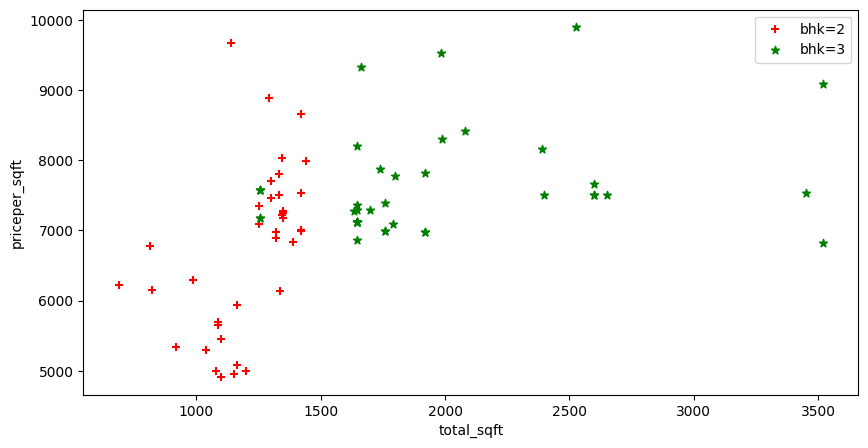

In [57]:
plotscatter(df5,'Hebbal')

In [58]:
dummies=pd.get_dummies(df5.location)

In [61]:
df5.head()

,location,size,total_sqft,price,bhk,price_persqft
0,others,3 BHK,2770.0,290.00,3,10469.314079
2,others,1 RK,510.0,25.25,1,4950.980392
4,others,1 BHK,600.0,38.00,1,6333.333333
7,others,2 BHK,1500.0,185.00,2,12333.333333
8,others,2 BHK,840.0,45.00,2,5357.142857


In [75]:
df6=pd.concat([df5,dummies.drop('others',axis='columns')],axis='columns')
df6.head()

,location,size,total_sqft,price,bhk,price_persqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,others,3 BHK,2770.0,290.00,3,10469.314079,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,others,1 RK,510.0,25.25,1,4950.980392,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,others,1 BHK,600.0,38.00,1,6333.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,others,2 BHK,1500.0,185.00,2,12333.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,others,2 BHK,840.0,45.00,2,5357.142857,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df6.drop(['location','price_persqft','size'],axis='columns',inplace=True)
df6.head(2)

,total_sqft,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,290.00,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,510.0,25.25,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
x=df6.drop('price',axis=1)
y=df6['price']

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [84]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [85]:
model.fit(x_train,y_train)

LinearRegression()

In [86]:
model.score(x_test,y_test)

0.8682829945421372

In [87]:
import pickle
with open('banglurumodel.pickle','wb') as f:
  pickle.dump(model,f)